In [1]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

In [2]:
matrix_data = pan.read_csv("wine_fraud.csv")

In [6]:
matrix_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [8]:
cat_data = matrix_data["type"]
non_cat_data = matrix_data.drop("type", axis = 1)

In [10]:
dummies = pan.get_dummies(cat_data, drop_first = True)
final_matrix_data = non_cat_data.merge(how = "inner", right = dummies, left_index = True, right_index = True)

In [14]:
#unique vars in the target column
final_matrix_data["quality"].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

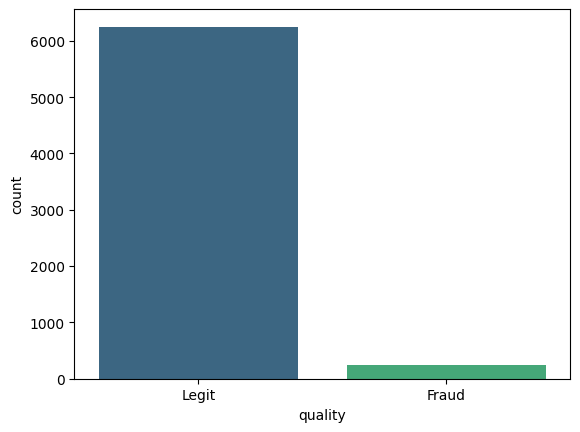

In [16]:
sns.countplot(x = final_matrix_data["quality"], palette = "viridis")
#highly unbalanced data

<Axes: xlabel='type', ylabel='count'>

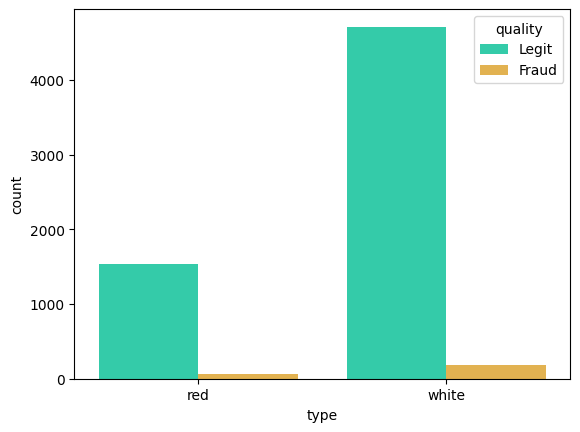

In [18]:
sns.countplot(x = matrix_data["type"], hue = matrix_data["quality"], palette = "turbo")

In [20]:
#what percent of red and white wines are frauds
#white
len(matrix_data[(matrix_data["type"] == "white" )&(matrix_data["quality"] == "Fraud")])/len(matrix_data[matrix_data["type"] == "white"]) * 100
len(matrix_data[(matrix_data["type"] == "red" )&(matrix_data["quality"] == "Fraud")])/len(matrix_data[matrix_data["type"] == "red"]) * 100

3.9399624765478425

In [28]:
test_matrix_data = pan.DataFrame(matrix_data)
test_matrix_data["quality"] = test_matrix_data["quality"].map({"Legit": 0, "Fraud": 1})
test_matrix_data.corr(numeric_only = True)["quality"].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality'>

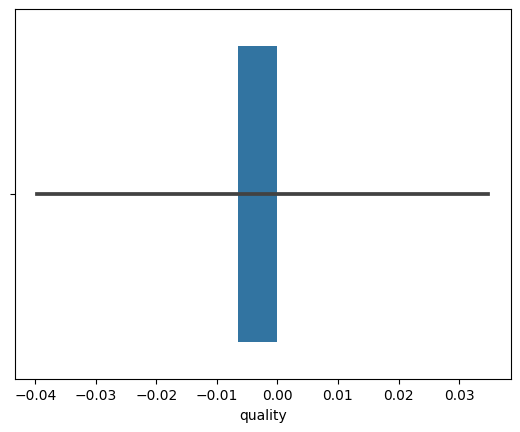

In [39]:
sns.barplot(x = test_matrix_data.corr(numeric_only = True)["quality"][:-1].sort_values())